In [19]:
import pathlib
from datetime import datetime, timedelta

import numpy as np
import pandas as pd
import xarray as xr
import satpy
from satpy import Scene

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [3]:
seviri_path = pathlib.Path(r"/gws/nopw/j04/eo_shared_data_vol1/satellite/seviri/Data/")

In [5]:
dates = pd.date_range(datetime(2021,7,1,4), datetime(2021,7,2,4), freq="h", inclusive="left")

In [6]:
dates

DatetimeIndex(['2021-07-01 04:00:00', '2021-07-01 05:00:00',
               '2021-07-01 06:00:00', '2021-07-01 07:00:00',
               '2021-07-01 08:00:00', '2021-07-01 09:00:00',
               '2021-07-01 10:00:00', '2021-07-01 11:00:00',
               '2021-07-01 12:00:00', '2021-07-01 13:00:00',
               '2021-07-01 14:00:00', '2021-07-01 15:00:00',
               '2021-07-01 16:00:00', '2021-07-01 17:00:00',
               '2021-07-01 18:00:00', '2021-07-01 19:00:00',
               '2021-07-01 20:00:00', '2021-07-01 21:00:00',
               '2021-07-01 22:00:00', '2021-07-01 23:00:00',
               '2021-07-02 00:00:00', '2021-07-02 01:00:00',
               '2021-07-02 02:00:00', '2021-07-02 03:00:00'],
              dtype='datetime64[ns]', freq='H')

In [16]:
seviri_files = sorted(sum([
    list((seviri_path/f'{date.strftime("%Y/%m/%d")}').glob(f'*-0100-NA-{date.strftime("%Y%m%d%H")}*Z-NA.nat'))
    for date in dates
], []))

In [17]:
len(seviri_files)

96

In [18]:
seviri_files[0]

PosixPath('/gws/nopw/j04/eo_shared_data_vol1/satellite/seviri/Data/2021/07/01/MSG4-SEVI-MSG15-0100-NA-20210701041243.746000000Z-NA.nat')

In [21]:
scn = Scene(seviri_files[0:1], reader="seviri_l1b_native")

In [22]:
scn.available_dataset_names()

['HRV',
 'IR_016',
 'IR_039',
 'IR_087',
 'IR_097',
 'IR_108',
 'IR_120',
 'IR_134',
 'VIS006',
 'VIS008',
 'WV_062',
 'WV_073']

In [23]:
scn.load(["IR_087", "IR_108", "IR_120", "WV_062", "WV_073"])

/home/users/wkjones/miniconda3/envs/tobac_flow/lib/python3.11/site-packages/satpy/readers/seviri_base.py:489: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  dataset.coords['acq_time'] = ('y', acq_time)
/home/users/wkjones/miniconda3/envs/tobac_flow/lib/python3.11/site-packages/satpy/readers/seviri_base.py:489: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-

In [24]:
scn.to_xarray()

/home/users/wkjones/miniconda3/envs/tobac_flow/lib/python3.11/site-packages/satpy/writers/cf_writer.py:926: UserWarning: Cannot pretty-format "acq_time" coordinates because they are not identical among the given datasets
  dict_dataarrays = make_alt_coords_unique(dict_dataarrays, pretty=pretty)


<xarray.Dataset>
Dimensions:             (y: 3712, x: 3712)
Coordinates:
    IR_087_acq_time     (y) datetime64[ns] NaT NaT NaT NaT ... NaT NaT NaT NaT
  * y                   (y) float64 -5.566e+06 -5.563e+06 ... 5.569e+06
  * x                   (x) float64 5.566e+06 5.563e+06 ... -5.569e+06
    longitude           (y, x) float64 dask.array<chunksize=(928, 3712), meta=np.ndarray>
    latitude            (y, x) float64 dask.array<chunksize=(928, 3712), meta=np.ndarray>
    IR_108_acq_time     (y) datetime64[ns] NaT NaT NaT NaT ... NaT NaT NaT NaT
    IR_120_acq_time     (y) datetime64[ns] NaT NaT NaT NaT ... NaT NaT NaT NaT
    WV_062_acq_time     (y) datetime64[ns] NaT NaT NaT NaT ... NaT NaT NaT NaT
    WV_073_acq_time     (y) datetime64[ns] NaT NaT NaT NaT ... NaT NaT NaT NaT
Data variables:
    msg_seviri_fes_3km  int64 0
    IR_087              (y, x) float32 dask.array<chunksize=(928, 3712), meta=np.ndarray>
    IR_108              (y, x) float32 dask.array<chunksize=(928, 3712), meta=np.ndarray>
    IR_120              (y, x) float32 dask.array<chunksize=(928, 3712), meta=np.ndarray>
    WV_062              (y, x) float32 dask.array<chunksize=(928, 3712), meta=np.ndarray>
    WV_073              (y, x) float32 dask.array<chunksize=(928, 3712), meta=np.ndarray>
Attributes:
    history:      Created by pytroll/satpy on 2024-11-13 06:16:34.605780
    Conventions:  CF-1.7

In [29]:
resampled_scn = scn.resample("EPSG_4326_3600x1800")

In [30]:
resampled_scn.to_xarray()

<xarray.Dataset>
Dimensions:              (y: 1800, x: 3600)
Coordinates:
  * y                    (y) float64 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
  * x                    (x) float64 -179.9 -179.8 -179.8 ... 179.8 179.9 180.0
    longitude            (y, x) float64 dask.array<chunksize=(1800, 3600), meta=np.ndarray>
    latitude             (y, x) float64 dask.array<chunksize=(1800, 3600), meta=np.ndarray>
Data variables:
    EPSG_4326_3600x1800  int64 0
    IR_087               (y, x) float32 dask.array<chunksize=(1800, 3600), meta=np.ndarray>
    IR_108               (y, x) float32 dask.array<chunksize=(1800, 3600), meta=np.ndarray>
    IR_120               (y, x) float32 dask.array<chunksize=(1800, 3600), meta=np.ndarray>
    WV_062               (y, x) float32 dask.array<chunksize=(1800, 3600), meta=np.ndarray>
    WV_073               (y, x) float32 dask.array<chunksize=(1800, 3600), meta=np.ndarray>
Attributes:
    history:      Created by pytroll/satpy on 2024-11-13 06:19:37.138614
    Conventions:  CF-1.7

In [31]:
from pyresample.geometry import AreaDefinition
from pyproj.crs import CRS

In [32]:
CRS(4326)

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World: Afghanistan, Albania, Algeria, American Samoa, Andorra, Angola, Anguilla, Antarctica, Antigua and Barbuda, Argentina, Armenia, Aruba, Australia, Austria, Azerbaijan, Bahamas, Bahrain, Bangladesh, Barbados, Belgium, Belgium, Belize, Benin, Bermuda, Bhutan, Bolivia, Bonaire, Saint Eustasius and Saba, Bosnia and Herzegovina, Botswana, Bouvet Island, Brazil, British Indian Ocean Territory, British Virgin Islands, Brunei Darussalam, Bulgaria, Burkina Faso, Burundi, Cambodia, Cameroon, Canada, Cape Verde, Cayman Islands, Central African Republic, Chad, Chile, China, Christmas Island, Cocos (Keeling) Islands, Comoros, Congo, Cook Islands, Costa Rica, Côte d'Ivoire (Ivory Coast), Croatia, Cuba, Curacao, Cyprus, Czechia, Denmark, Djibouti, Dominica, Dominican Republic, East Timor, Ecuador, Egypt, El Salvador, Equatoria

In [85]:
EPSG_4326_900x900 = AreaDefinition(
    "EPSG_4326_900x900", 
    "Global equal latitude/longitude grid at 0.2 degree resolution", 
    "longlat",
    projection="4326",
    width=900, height=900, area_extent=(-90,-90,90,90)
)

In [86]:
resampled_scn = scn.resample(EPSG_4326_1800x900)

In [43]:
grid_ds = resampled_scn.to_xarray()

In [44]:
grid_ds

<xarray.Dataset>
Dimensions:             (y: 900, x: 900)
Coordinates:
  * y                   (y) float64 89.9 89.7 89.5 89.3 ... -89.5 -89.7 -89.9
  * x                   (x) float64 -89.9 -89.7 -89.5 -89.3 ... 89.5 89.7 89.9
    longitude           (y, x) float64 dask.array<chunksize=(900, 900), meta=np.ndarray>
    latitude            (y, x) float64 dask.array<chunksize=(900, 900), meta=np.ndarray>
Data variables:
    EPSG_4326_1800x900  int64 0
    IR_087              (y, x) float32 dask.array<chunksize=(900, 900), meta=np.ndarray>
    IR_108              (y, x) float32 dask.array<chunksize=(900, 900), meta=np.ndarray>
    IR_120              (y, x) float32 dask.array<chunksize=(900, 900), meta=np.ndarray>
    WV_062              (y, x) float32 dask.array<chunksize=(900, 900), meta=np.ndarray>
    WV_073              (y, x) float32 dask.array<chunksize=(900, 900), meta=np.ndarray>
Attributes:
    history:      Created by pytroll/satpy on 2024-11-13 06:25:59.177956
    Conventions:  CF-1.7

In [54]:
# grid_ds = grid_ds.rename_vars(IR_108="bt")
grid_ds["wvd"] = grid_ds.WV_062 - grid_ds.WV_073
grid_ds["swd"] = grid_ds.IR_087 - grid_ds.IR_120

In [55]:
grid_ds

<xarray.Dataset>
Dimensions:             (y: 900, x: 900)
Coordinates:
  * y                   (y) float64 89.9 89.7 89.5 89.3 ... -89.5 -89.7 -89.9
  * x                   (x) float64 -89.9 -89.7 -89.5 -89.3 ... 89.5 89.7 89.9
    longitude           (y, x) float64 dask.array<chunksize=(900, 900), meta=np.ndarray>
    latitude            (y, x) float64 dask.array<chunksize=(900, 900), meta=np.ndarray>
Data variables:
    EPSG_4326_1800x900  int64 0
    IR_087              (y, x) float32 dask.array<chunksize=(900, 900), meta=np.ndarray>
    bt                  (y, x) float32 dask.array<chunksize=(900, 900), meta=np.ndarray>
    IR_120              (y, x) float32 dask.array<chunksize=(900, 900), meta=np.ndarray>
    WV_062              (y, x) float32 dask.array<chunksize=(900, 900), meta=np.ndarray>
    WV_073              (y, x) float32 dask.array<chunksize=(900, 900), meta=np.ndarray>
    wvd                 (y, x) float32 dask.array<chunksize=(900, 900), meta=np.ndarray>
    swd                 (y, x) float32 dask.array<chunksize=(900, 900), meta=np.ndarray>
Attributes:
    history:      Created by pytroll/satpy on 2024-11-13 06:25:59.177956
    Conventions:  CF-1.7

/home/users/wkjones/miniconda3/envs/tobac_flow/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in sin
  return func(*(_execute_task(a, cache) for a in args))
/home/users/wkjones/miniconda3/envs/tobac_flow/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in cos
  return func(*(_execute_task(a, cache) for a in args))


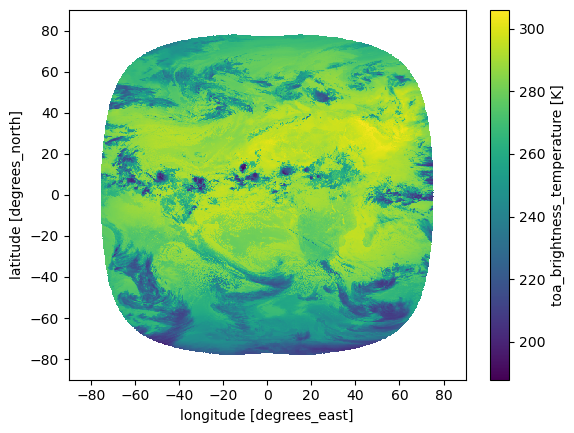

In [56]:
grid_ds.bt.plot()

/home/users/wkjones/miniconda3/envs/tobac_flow/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in sin
  return func(*(_execute_task(a, cache) for a in args))
/home/users/wkjones/miniconda3/envs/tobac_flow/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in cos
  return func(*(_execute_task(a, cache) for a in args))


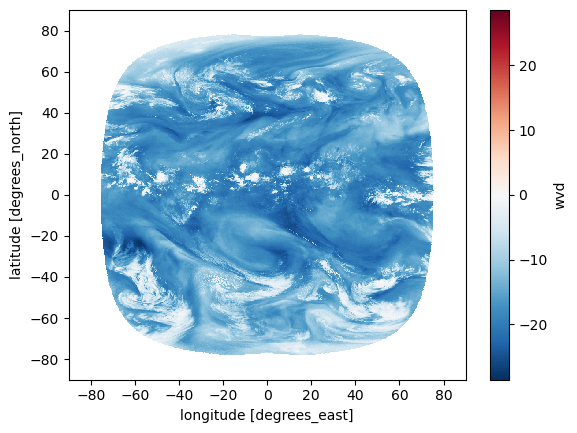

In [57]:
grid_ds.wvd.plot()

/home/users/wkjones/miniconda3/envs/tobac_flow/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in sin
  return func(*(_execute_task(a, cache) for a in args))
/home/users/wkjones/miniconda3/envs/tobac_flow/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in cos
  return func(*(_execute_task(a, cache) for a in args))


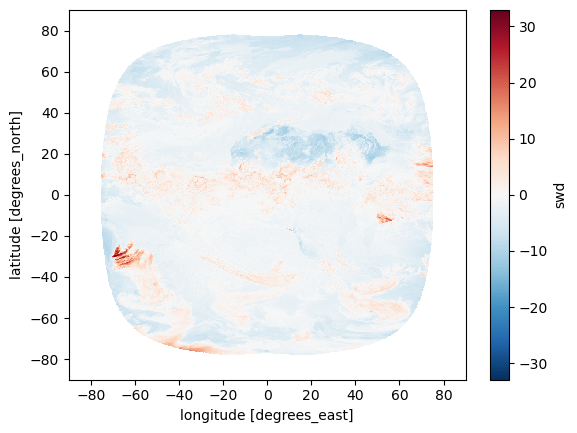

In [58]:
grid_ds.swd.plot()

In [60]:
grid_ds = grid_ds.drop_vars(["IR_087", "IR_120", "WV_062", "WV_073"])

In [61]:
grid_ds

<xarray.Dataset>
Dimensions:             (y: 900, x: 900)
Coordinates:
  * y                   (y) float64 89.9 89.7 89.5 89.3 ... -89.5 -89.7 -89.9
  * x                   (x) float64 -89.9 -89.7 -89.5 -89.3 ... 89.5 89.7 89.9
    longitude           (y, x) float64 dask.array<chunksize=(900, 900), meta=np.ndarray>
    latitude            (y, x) float64 dask.array<chunksize=(900, 900), meta=np.ndarray>
Data variables:
    EPSG_4326_1800x900  int64 0
    bt                  (y, x) float32 dask.array<chunksize=(900, 900), meta=np.ndarray>
    wvd                 (y, x) float32 dask.array<chunksize=(900, 900), meta=np.ndarray>
    swd                 (y, x) float32 dask.array<chunksize=(900, 900), meta=np.ndarray>
Attributes:
    history:      Created by pytroll/satpy on 2024-11-13 06:25:59.177956
    Conventions:  CF-1.7

In [62]:
EPSG_4326_900x900 = AreaDefinition(
    "EPSG_4326_900x900", 
    "Global equal latitude/longitude grid at 0.2 degree resolution", 
    "longlat",
    projection=CRS(4326),
    width=900, height=900, area_extent=(-90,-90,90,90)
)

def load_regrid_seviri(filename):
    scn = Scene([filename], reader="seviri_l1b_native")
    scn.load(["IR_087", "IR_108", "IR_120", "WV_062", "WV_073"])
    scn = scn.resample(EPSG_4326_900x900)
    grid_ds = scn.to_xarray()
    grid_ds = grid_ds.rename_vars(IR_108="bt")
    grid_ds["wvd"] = grid_ds.WV_062 - grid_ds.WV_073
    grid_ds["swd"] = grid_ds.IR_087 - grid_ds.IR_120
    grid_ds = grid_ds.drop_vars(["IR_087", "IR_120", "WV_062", "WV_073"])
    return grid_ds

In [73]:
regridded_ds = load_regrid_seviri(seviri_files[0]).load()

/home/users/wkjones/miniconda3/envs/tobac_flow/lib/python3.11/site-packages/satpy/readers/seviri_base.py:489: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  dataset.coords['acq_time'] = ('y', acq_time)
/home/users/wkjones/miniconda3/envs/tobac_flow/lib/python3.11/site-packages/satpy/readers/seviri_base.py:489: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-

In [72]:
save_dir = pathlib.Path(r"/work/scratch-nopw2/wkjones/seviri_regrid")
save_dir.mkdir(parents=True, exist_ok=True)

In [74]:
save_dir / f'{seviri_files[0].stem}.nc'

PosixPath('/work/scratch-nopw2/wkjones/seviri_regrid/MSG4-SEVI-MSG15-0100-NA-20210701041243.746000000Z-NA.nc')

In [75]:
regridded_ds.to_netcdf(save_dir / f'{seviri_files[0].stem}.nc')

In [77]:
seviri_files[1]

PosixPath('/gws/nopw/j04/eo_shared_data_vol1/satellite/seviri/Data/2021/07/01/MSG4-SEVI-MSG15-0100-NA-20210701042742.718000000Z-NA.nat')

In [79]:
test_ds = xr.open_dataset("/work/scratch-nopw2/wkjones/seviri_regrid/MSG4-SEVI-MSG15-0100-NA-20210701042742.718000000Z-NA.nc")

In [80]:
test_ds

<xarray.Dataset>
Dimensions:            (y: 900, x: 900)
Coordinates:
  * y                  (y) float64 89.9 89.7 89.5 89.3 ... -89.5 -89.7 -89.9
  * x                  (x) float64 -89.9 -89.7 -89.5 -89.3 ... 89.5 89.7 89.9
    longitude          (y, x) float64 ...
    latitude           (y, x) float64 ...
Data variables:
    EPSG_4326_900x900  int64 ...
    bt                 (y, x) float32 ...
    wvd                (y, x) float32 ...
    swd                (y, x) float32 ...
Attributes:
    history:      Created by pytroll/satpy on 2024-11-13 06:47:21.380020
    Conventions:  CF-1.7

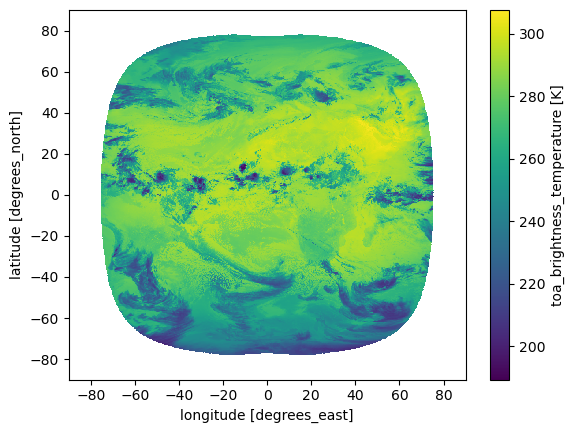

In [81]:
test_ds.bt.plot()

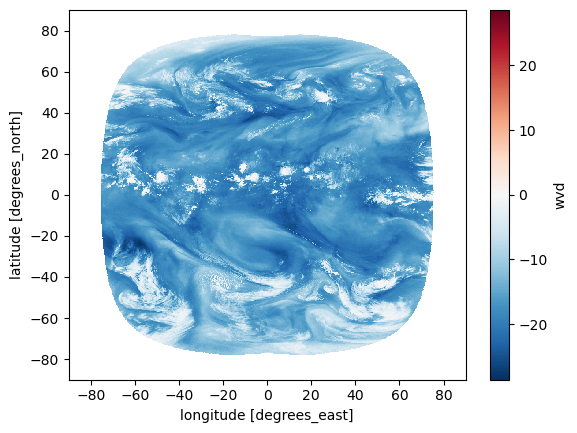

In [82]:
test_ds.wvd.plot()

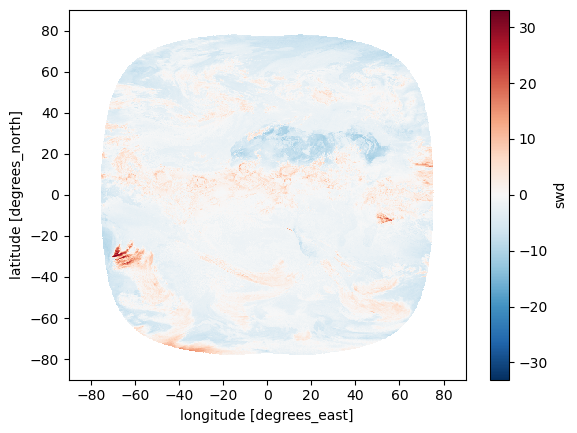

In [83]:
test_ds.swd.plot()

In [87]:
import pyproj

In [88]:
pyproj.datadir.get_data_dir()

'/opt/jaspy/share/proj'

In [89]:
regrid_files = sorted(list(save_dir.glob("*.nc")))

In [90]:
regrid_ds = xr.open_mfdataset(regrid_files, combine="nested", concat_dim="t")

In [91]:
regrid_ds

<xarray.Dataset>
Dimensions:            (t: 96, y: 900, x: 900)
Coordinates:
  * y                  (y) float64 89.9 89.7 89.5 89.3 ... -89.5 -89.7 -89.9
  * x                  (x) float64 -89.9 -89.7 -89.5 -89.3 ... 89.5 89.7 89.9
    longitude          (y, x) float64 dask.array<chunksize=(900, 900), meta=np.ndarray>
    latitude           (y, x) float64 dask.array<chunksize=(900, 900), meta=np.ndarray>
Dimensions without coordinates: t
Data variables:
    EPSG_4326_900x900  (t) int64 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    bt                 (t, y, x) float32 dask.array<chunksize=(1, 900, 900), meta=np.ndarray>
    wvd                (t, y, x) float32 dask.array<chunksize=(1, 900, 900), meta=np.ndarray>
    swd                (t, y, x) float32 dask.array<chunksize=(1, 900, 900), meta=np.ndarray>
Attributes:
    history:      Created by pytroll/satpy on 2024-11-13 07:00:38.028579
    Conventions:  CF-1.7

In [103]:
regrid_ds = regrid_ds.assign_coords(t=pd.DatetimeIndex(
    pd.date_range(datetime(2021,7,1,4), datetime(2021,7,2,4), freq="900s", inclusive="left")
))

In [104]:
regrid_ds

<xarray.Dataset>
Dimensions:            (t: 96, y: 900, x: 900)
Coordinates:
  * y                  (y) float64 89.9 89.7 89.5 89.3 ... -89.5 -89.7 -89.9
  * x                  (x) float64 -89.9 -89.7 -89.5 -89.3 ... 89.5 89.7 89.9
    longitude          (y, x) float64 dask.array<chunksize=(900, 900), meta=np.ndarray>
    latitude           (y, x) float64 dask.array<chunksize=(900, 900), meta=np.ndarray>
  * t                  (t) datetime64[ns] 2021-07-01T04:00:00 ... 2021-07-02T...
Data variables:
    EPSG_4326_900x900  (t) int64 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    bt                 (t, y, x) float32 dask.array<chunksize=(1, 900, 900), meta=np.ndarray>
    wvd                (t, y, x) float32 dask.array<chunksize=(1, 900, 900), meta=np.ndarray>
    swd                (t, y, x) float32 dask.array<chunksize=(1, 900, 900), meta=np.ndarray>
Attributes:
    history:      Created by pytroll/satpy on 2024-11-13 07:00:38.028579
    Conventions:  CF-1.7